In [49]:
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import seaborn as sns

In [50]:
path="C:\Users\hp\Desktop\Python -Files\CREDIT CARD SPEND PREDICTION PROBLEM- BANKING-REGRESSION\CREDIT_CARD_USERS_DATA_1.xlsx"
Cust=pd.read_excel(path)

In [51]:
Cust.head(5)

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1,2.0,1,20,2,September,15,3,1,...,0,0,0,1,1,0,0,0,1,0
1,0648-AIPJSP-UVM,5,5.0,0,22,2,May,17,4,2,...,1,1,1,1,1,1,1,0,0,0
2,5195-TLUDJE-HVO,3,4.0,1,67,6,June,14,2,2,...,1,0,0,0,0,0,1,0,0,0
3,4459-VLPQUH-3OL,4,3.0,0,23,2,May,16,3,2,...,1,0,1,1,1,0,1,1,0,0
4,8158-SMTQFB-CNO,2,2.0,0,26,3,July,16,3,2,...,1,0,1,0,1,0,0,0,1,0


In [4]:
import pandas_profiling

C:\Users\hp\Anaconda2\lib\site-packages\matplotlib\__init__.py:1401: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [5]:
pandas_profiling.ProfileReport(Cust)

Number of variables,132
Number of observations,5000
Total Missing (%),0.2%
Total size in memory,5.0 MiB
Average record size in memory,1.0 KiB
Numeric,110
Categorical,1
Date,0
Text (Unique),1
Rejected,20
Distinct count,2


In [52]:
Cust_num=Cust._get_numeric_data()

In [53]:
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=Cust_num.apply(lambda x: var_summary(x)).T

In [54]:
num_summary

,N,NMISS,SUM,MEAN,MEDIAN,STD,VAR,MIN,P1,P5,P10,P25,P50,P75,P90,P95,P99,MAX
region,5000.0,0.0,1.500700e+04,3.001400,3.000000,1.421760,2.021402e+00,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000
townsize,4998.0,2.0,1.343100e+04,2.687275,3.000000,1.425925,2.033262e+00,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,4.000000,5.000000,5.000000,5.000000,5.000000
gender,5000.0,0.0,2.518000e+03,0.503600,1.000000,0.500037,2.500370e-01,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
age,5000.0,0.0,2.351280e+05,47.025600,47.000000,17.770338,3.157849e+02,18.000000,18.000000,20.000000,23.000000,31.000000,47.000000,62.000000,72.000000,76.000000,79.000000,79.000000
agecat,5000.0,0.0,2.119400e+04,4.238800,4.000000,1.308785,1.712917e+00,2.000000,2.000000,2.000000,2.000000,3.000000,4.000000,5.000000,6.000000,6.000000,6.000000,6.000000
ed,5000.0,0.0,7.271500e+04,14.543000,14.000000,3.281083,1.076550e+01,6.000000,8.000000,9.000000,10.000000,12.000000,14.000000,17.000000,19.000000,20.000000,21.000000,23.000000
edcat,5000.0,0.0,1.336000e+04,2.672000,2.000000,1.211738,1.468310e+00,1.000000,1.000000,1.000000,1.000000,2.000000,2.000000,4.000000,4.000000,5.000000,5.000000,5.000000
jobcat,5000.0,0.0,1.376400e+04,2.752800,2.000000,1.737900,3.020296e+00,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,4.000000,6.000000,6.000000,6.000000,6.000000
union,5000.0,0.0,7.560000e+02,0.151200,0.000000,0.358280,1.283642e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
employ,5000.0,0.0,4.865200e+04,9.730400,7.000000,9.690929,9.391410e+01,0.000000,0.000000,0.000000,0.000000,2.000000,7.000000,15.000000,25.000000,31.000000,39.000000,52.000000


In [9]:
num_summary.to_csv('num_summary.csv')


In [55]:
Cust_cat=Cust.select_dtypes(include=['object'])
Cust_cat.head(5)

,custid,birthmonth
0,3964-QJWTRG-NPN,September
1,0648-AIPJSP-UVM,May
2,5195-TLUDJE-HVO,June
3,4459-VLPQUH-3OL,May
4,8158-SMTQFB-CNO,July


In [56]:
def cat_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.value_counts()], 
                  index=['N', 'NMISS', 'ColumnsNames'])

cat_summary=Cust_cat.apply(lambda x: cat_summary(x))
cat_summary

,custid,birthmonth
N,5000,5000
NMISS,0,0
ColumnsNames,0361-OPHNCS-BH2 1 7698-RZOTTO-EC9 1 8389...,September 458 May 451 January ...


In [15]:
cat_summary.to_csv('cat_summary.csv')

In [57]:
Cust.drop(["lnwireten","lnwiremon","lnequipmon","lnequipten","lntollten","lntollmon","lncardten","lncardmon"],
                axis=1,inplace=True)

In [58]:
Cust['totalcard_spend']=Cust['cardspent']+Cust['card2spent']

In [59]:
Cust.head()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,totalcard_spend
0,3964-QJWTRG-NPN,1,2.0,1,20,2,September,15,3,1,...,0,0,1,1,0,0,0,1,0,149.46
1,0648-AIPJSP-UVM,5,5.0,0,22,2,May,17,4,2,...,1,1,1,1,1,1,0,0,0,77.54
2,5195-TLUDJE-HVO,3,4.0,1,67,6,June,14,2,2,...,0,0,0,0,0,1,0,0,0,359.97
3,4459-VLPQUH-3OL,4,3.0,0,23,2,May,16,3,2,...,0,1,1,1,0,1,1,0,0,359.41
4,8158-SMTQFB-CNO,2,2.0,0,26,3,July,16,3,2,...,0,1,0,1,0,0,0,1,0,507.83


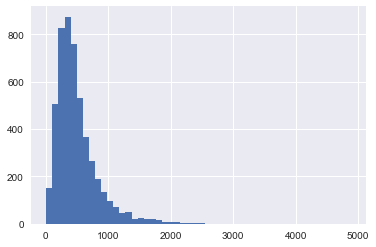

In [60]:
Cust['totalcard_spend'].hist(bins=50)

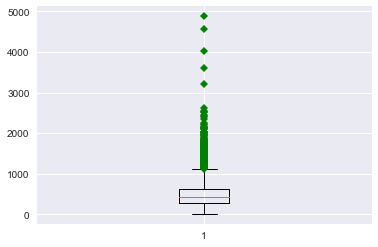

In [61]:
plt.boxplot(Cust['totalcard_spend'].values,sym='gD');

In [62]:
Cust["ln_totalcard_spend"]= np.log(Cust["totalcard_spend"]+1)

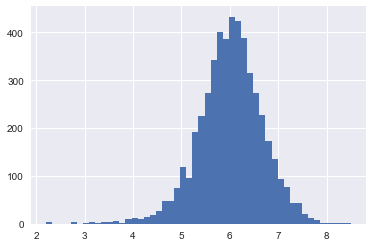

In [63]:
Cust['ln_totalcard_spend'].hist(bins=50)

In [64]:
Cust=Cust.drop(['cardspent','card2spent'],axis=1)

In [21]:
Cust.head(2)

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03,totalcard_spend,ln_totalcard_spend
0,3964-QJWTRG-NPN,1,2.0,1,20,2,September,15,3,1,...,0,1,1,0,0,0,1,0,149.46,5.013697
1,0648-AIPJSP-UVM,5,5.0,0,22,2,May,17,4,2,...,1,1,1,1,1,0,0,0,77.54,4.363608


In [65]:
null_col=Cust.columns[Cust.isnull().any()].tolist()
null_col

[u'townsize',
 u'lncreddebt',
 u'lnothdebt',
 u'commutetime',
 u'longten',
 u'lnlongten',
 u'cardten']

In [66]:
Cust['ln_totalcard_spend'].quantile(0.99)

7.473695119786394

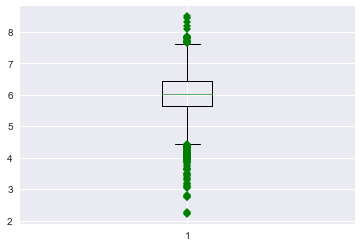

In [67]:
plt.boxplot(Cust['ln_totalcard_spend'].values,sym='gD');

In [68]:
#Handling Outliers
Cust['ln_totalcard_spend']= Cust['ln_totalcard_spend'].clip_upper(Cust['ln_totalcard_spend'].quantile(0.99)) 
Cust['ln_totalcard_spend']= Cust['ln_totalcard_spend'].clip_lower(Cust['ln_totalcard_spend'].quantile(0.01)) 


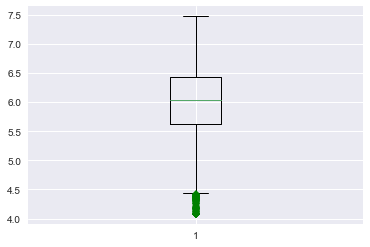

In [69]:
plt.boxplot(Cust['ln_totalcard_spend'].values,sym='gD');

In [70]:
Cust['lncreddebt']=Cust['lncreddebt'].fillna(Cust['lncreddebt'].mean())
Cust['lnothdebt']=Cust['lnothdebt'].fillna(Cust['lnothdebt'].mean())
Cust['commutetime']=Cust['commutetime'].fillna(Cust['commutetime'].mean())
Cust['longten']=Cust['longten'].fillna(Cust['longten'].mean())
Cust['lnlongten']=Cust['lnlongten'].fillna(Cust['lnlongten'].mean())
Cust['cardten']=Cust['cardten'].fillna(Cust['cardten'].mean())

In [82]:
# dropping column which have respective categorical column. Also dropping alreday log trannformed column & some categotrical features
col_list_drop=['birthmonth','employ','address','cartype','commute','commutecar','commutemotorcycle',
              'commutecarpool','commutebus','commuterail','commutepublic','commutebike','commutewalk','commutenonmotor','telecommute',
               'bfast','townsize','union','jobsat',
                  'spousedcat','cars','carcatvalue','carown','commutecat','reason',
                  'polview','polcontrib','polparty','vote','cardbenefit','cardfee',
                  'card2type','card2benefit','card2fee','active',
                 'churn','tollfree','equip','callcard','wireless','multline','voice','pager','internet','callid','callwait',
                  'forward','confer','owntv','ownvcr','owndvd','owncd','ownpda','ownpc','ownipod','owngame','ownfax','news',
                 'response_01','response_02','response_03','carbuy','carbought']

# Based on exploratory analysis, define the categorical and continuous variables for scaling purpose and remove the variables with significant missing values

categorical_fields=['agecat','gender','edcat','jobcat','retire',"default","marital","cardtenurecat","card2tenurecat",
                  "hometype",'card','inccat','card2','region','empcat','homeown', "ebill",
                    "cardtype"]                           


numerical_fields = ["age","ed","income","lninc","debtinc","creddebt","lncreddebt","othdebt",
                 "lnothdebt","spoused","reside","pets","pets_cats","pets_dogs","pets_birds","pets_reptiles",
                 "pets_small","pets_saltfish","pets_freshfish","carvalue","commutetime","carditems",
                 "card2items","tenure","longmon","lnlongmon","longten","lnlongten","tollmon","tollten",
                  "equipmon","equipten","cardmon","cardten","wiremon","wireten","hourstv"]

Target = ['ln_totalcard_spend']

In [77]:
Cust1=Cust.drop(col_list_drop,axis=1)

In [76]:
Cust.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 124 entries, custid to ln_totalcard_spend
dtypes: float64(23), int64(99), object(2)
memory usage: 4.7+ MB


In [79]:
Cust1.head()

,custid,region,gender,age,agecat,ed,edcat,jobcat,empcat,retire,...,equipmon,equipten,cardmon,cardten,wiremon,wireten,ebill,hourstv,totalcard_spend,ln_totalcard_spend
0,3964-QJWTRG-NPN,1,1,20,2,15,3,1,1,0,...,29.50,126.1,14.25,60.0,0.00,0.00,0,13,149.46,5.013697
1,0648-AIPJSP-UVM,5,0,22,2,17,4,2,1,0,...,54.85,1975.0,16.00,610.0,45.65,1683.55,1,18,77.54,4.363608
2,5195-TLUDJE-HVO,3,1,67,6,14,2,2,5,0,...,0.00,0.0,23.00,1410.0,0.00,0.00,0,21,359.97,5.888795
3,4459-VLPQUH-3OL,4,0,23,2,16,3,2,1,0,...,0.00,0.0,21.00,685.0,0.00,0.00,1,26,359.41,5.887242
4,8158-SMTQFB-CNO,2,0,26,3,16,3,2,1,0,...,0.00,0.0,17.25,360.0,19.05,410.80,0,27,507.83,6.232114


In [80]:
Cust_cat=Cust1.select_dtypes(include=['object'])
Cust_cat

,custid
0,3964-QJWTRG-NPN
1,0648-AIPJSP-UVM
2,5195-TLUDJE-HVO
3,4459-VLPQUH-3OL
4,8158-SMTQFB-CNO
5,9662-FUSYIM-1IV
6,7432-QKQFJJ-K72
7,8959-RZWRHU-ST8
8,9124-DZALHM-S6I
9,3512-MUWBGY-52X


In [47]:
Cust1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 61 columns):
custid                5000 non-null object
region                5000 non-null int64
gender                5000 non-null int64
age                   5000 non-null int64
agecat                5000 non-null int64
ed                    5000 non-null int64
edcat                 5000 non-null int64
jobcat                5000 non-null int64
empcat                5000 non-null int64
retire                5000 non-null int64
income                5000 non-null int64
lninc                 5000 non-null float64
inccat                5000 non-null int64
debtinc               5000 non-null float64
creddebt              5000 non-null float64
lncreddebt            5000 non-null float64
othdebt               5000 non-null float64
lnothdebt             5000 non-null float64
default               5000 non-null int64
marital               5000 non-null int64
spoused               5000 non-null int6

In [83]:
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [84]:
for c_feature in categorical_fields:
    Cust1 = create_dummies( Cust1, c_feature )

In [85]:
Cust1.columns

Index([            u'custid',                u'age',                 u'ed',
                   u'income',              u'lninc',            u'debtinc',
                 u'creddebt',         u'lncreddebt',            u'othdebt',
                u'lnothdebt',            u'spoused',             u'reside',
                     u'pets',          u'pets_cats',          u'pets_dogs',
               u'pets_birds',      u'pets_reptiles',         u'pets_small',
            u'pets_saltfish',     u'pets_freshfish',         u'addresscat',
                 u'carvalue',        u'commutetime',         u'cardtenure',
              u'card2tenure',          u'carditems',         u'card2items',
                   u'tenure',            u'longmon',          u'lnlongmon',
                  u'longten',          u'lnlongten',            u'tollmon',
                  u'tollten',           u'equipmon',           u'equipten',
                  u'cardmon',            u'cardten',            u'wiremon',
            

In [86]:
Cust1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 96 columns):
custid                5000 non-null object
age                   5000 non-null int64
ed                    5000 non-null int64
income                5000 non-null int64
lninc                 5000 non-null float64
debtinc               5000 non-null float64
creddebt              5000 non-null float64
lncreddebt            5000 non-null float64
othdebt               5000 non-null float64
lnothdebt             5000 non-null float64
spoused               5000 non-null int64
reside                5000 non-null int64
pets                  5000 non-null int64
pets_cats             5000 non-null int64
pets_dogs             5000 non-null int64
pets_birds            5000 non-null int64
pets_reptiles         5000 non-null int64
pets_small            5000 non-null int64
pets_saltfish         5000 non-null int64
pets_freshfish        5000 non-null int64
addresscat            5000 non-null int6

In [91]:
p = Series(Cust1.corr()['ln_totalcard_spend']).sort_values()[:40]
p

retire_1           -0.198196
card_2             -0.119320
card_3             -0.110752
agecat_6           -0.096122
card2_3            -0.086779
gender_1           -0.078624
card2_2            -0.075722
jobcat_2           -0.075312
card_4             -0.073135
hometype_2         -0.063177
inccat_2           -0.060804
card2_5            -0.052729
edcat_2            -0.050463
card_5             -0.045873
card2tenurecat_2   -0.043513
cardtenurecat_3    -0.031450
agecat_3           -0.026799
cardtenurecat_2    -0.026195
empcat_2           -0.020031
pets_birds         -0.018880
jobcat_4           -0.016882
hometype_4         -0.010609
pets_freshfish     -0.006926
pets               -0.004090
jobcat_5           -0.003749
region_2           -0.003341
region_3           -0.001535
cardtype_4         -0.001090
pets_small          0.000653
cardtype_3          0.000880
cardtype_2          0.001184
jobcat_6            0.001787
pets_saltfish       0.002791
pets_cats           0.003576
reside        

In [92]:
Cust1[numerical_fields].corr()

,age,ed,income,lninc,debtinc,creddebt,lncreddebt,othdebt,lnothdebt,spoused,...,lnlongten,tollmon,tollten,equipmon,equipten,cardmon,cardten,wiremon,wireten,hourstv
age,1.000000,-0.094560,0.189301,0.144156,0.039084,1.196330e-01,0.109246,0.137583,0.126314,-0.002892,...,0.569398,0.109114,0.262278,-0.101777,0.093005,0.287552,0.442550,-0.021753,0.109004,-0.027446
ed,-0.094560,1.000000,0.178036,0.208098,0.011633,1.057004e-01,0.129974,0.126778,0.154119,0.117563,...,-0.081134,0.017998,-0.016435,0.449279,0.341991,-0.039545,-0.077870,0.345550,0.261909,-0.009503
income,0.189301,0.178036,1.000000,0.834109,0.017195,6.674523e-01,0.496171,0.733298,0.557036,0.038089,...,0.213569,0.230254,0.271246,0.104136,0.154211,0.143800,0.170612,0.212095,0.248351,0.050430
lninc,0.144156,0.208098,0.834109,1.000000,0.013967,4.893251e-01,0.581566,0.580732,0.664677,0.046866,...,0.197504,0.229404,0.254566,0.128721,0.162957,0.131250,0.138396,0.219233,0.235315,0.106488
debtinc,0.039084,0.011633,0.017195,0.013967,1.000000,3.683937e-01,0.546985,0.452857,0.621085,-0.037940,...,0.018223,-0.006992,0.004299,-0.001504,0.011958,0.010197,0.011729,-0.001967,0.008023,-0.012902
creddebt,0.119633,0.105700,0.667452,0.489325,0.368394,1.000000e+00,0.629002,0.667345,0.462521,0.009836,...,0.123995,0.140775,0.169986,0.041659,0.078006,0.084960,0.098433,0.115575,0.148449,0.037597
lncreddebt,0.109246,0.129974,0.496171,0.581566,0.546985,6.290016e-01,1.000000,0.493963,0.678835,0.006853,...,0.116028,0.110373,0.133002,0.073440,0.102726,0.064735,0.074451,0.113967,0.131666,0.038502
othdebt,0.137583,0.126778,0.733298,0.580732,0.452857,6.673453e-01,0.493963,1.000000,0.706475,0.026223,...,0.158876,0.166995,0.199775,0.069107,0.109601,0.101263,0.120811,0.164594,0.196583,0.038286
lnothdebt,0.126314,0.154119,0.557036,0.664677,0.621085,4.625208e-01,0.678835,0.706475,1.000000,0.007070,...,0.144051,0.144127,0.167976,0.083400,0.111652,0.089657,0.098417,0.145712,0.161281,0.060327
spoused,-0.002892,0.117563,0.038089,0.046866,-0.037940,9.836047e-03,0.006853,0.026223,0.007070,1.000000,...,0.165574,0.067241,0.090001,0.067971,0.110431,0.079605,0.102025,0.076121,0.100079,0.028922


In [93]:
from sklearn.preprocessing import imputation
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

C:\Users\hp\Anaconda2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [94]:
from sklearn.cross_validation import train_test_split

train_X, test_X, train_y, test_y = train_test_split( Cust1.drop(['custid','ln_totalcard_spend'],axis=1),
                                                  Cust1['ln_totalcard_spend'],
                                                  test_size = 0.2,
                                                  random_state = 42 )

In [95]:
print train_X.shape
print train_y.shape
print test_X.shape
print test_y.shape

(4000, 94)
(4000L,)
(1000, 94)
(1000L,)


                 FScores  Pvalues
totalcard_spend  11484.0      0.0
carditems         1361.0      0.0
card2items        1351.0      0.0
lninc              797.0      0.0
income             467.0      0.0
carvalue           422.0      0.0
lnothdebt          333.0      0.0
lncreddebt         258.0      0.0
othdebt            237.0      0.0
inccat_5           205.0      0.0
retire_1           173.0      0.0
creddebt           150.0      0.0
inccat_4           135.0      0.0
card_2              57.0      0.0
card_3              56.0      0.0
agecat_5            51.0      0.0
inccat_3            43.0      0.0
wireten             40.0      0.0
tollten             39.0      0.0
ed                  39.0      0.0


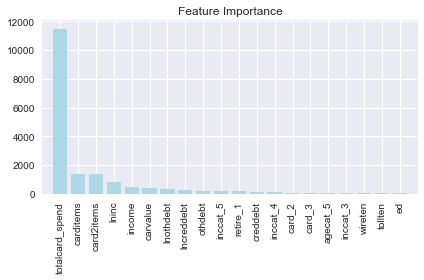

In [96]:
# analyze the feature importance for the data set, let us select the top 20 features based on the f scores
from sklearn.feature_selection import SelectKBest, f_regression
selector = SelectKBest(k=20, score_func=f_regression)
selector.fit(train_X, train_y)
selector.transform(train_X)

# get_support() creates a boolean mask to indicate which variables were selected
top20_features = train_X.columns[selector.get_support()]

important_features = (pd.DataFrame(data={'Pvalues': selector.pvalues_, 'FScores': selector.scores_}, 
                 index=train_X.columns.ravel()).loc[top20_features, :]).sort_values('FScores', ascending=False).round(0)

print (pd.DataFrame(data={'Pvalues': selector.pvalues_, 'FScores': selector.scores_}, 
                 index=train_X.columns.ravel())
       .loc[top20_features, :]).sort_values('FScores', ascending=False).round(0)
## Plot the feature importance in the bar chart.
plt.title("Feature Importance")
plt.bar(range(20),important_features["FScores"][0:20],color='lightblue',align='center')
plt.xticks(range(20),important_features.index[0:20],rotation=90)
plt.xlim([-1,20])
plt.tight_layout()
plt.show()

In [97]:
pd.DataFrame(train_X[top20_features])

,ed,income,lninc,creddebt,lncreddebt,othdebt,lnothdebt,carvalue,carditems,card2items,tollten,wireten,totalcard_spend,agecat_5,retire_1,card_2,card_3,inccat_3,inccat_4,inccat_5
4227,18,45,3.806662,1.370610,0.315256,5.694390,1.739481,27.6,11,5,0.00,0.00,460.70,0,0,0,1,0,0,0
4676,14,38,3.637586,1.494844,0.402022,1.887156,0.635071,19.7,11,9,2321.55,2933.50,538.23,0,1,0,1,0,0,0
800,16,80,4.382027,2.832480,1.041153,2.207520,0.791870,47.7,7,6,1511.00,1858.65,413.31,0,0,0,0,0,1,0
3671,12,78,4.356709,1.725048,0.545255,2.720952,1.000982,39.1,11,1,0.00,0.00,171.02,0,0,0,1,0,1,0
4193,13,17,2.833213,0.282693,-1.263394,0.890307,-0.116189,9.5,11,5,276.65,0.00,238.31,0,0,0,1,0,0,0
2968,13,30,3.401197,1.070100,0.067752,2.619900,0.963136,11.7,10,4,995.35,0.00,379.72,0,0,0,0,0,0,0
4793,21,63,4.143135,7.569828,2.024170,6.794172,1.916065,51.2,10,4,0.00,0.00,596.52,1,0,1,0,1,0,0
4368,15,18,2.890372,1.042470,0.041593,1.531530,0.426267,10.3,6,5,0.00,621.30,279.97,0,0,0,0,0,0,0
2776,7,23,3.135494,1.081184,0.078057,1.310816,0.270650,10.4,10,0,0.00,0.00,110.23,0,0,0,0,0,0,0
2970,16,133,4.890349,7.908978,2.067999,6.189022,1.822777,-1.0,19,5,3346.35,6888.70,1323.48,0,1,1,0,0,0,1


In [98]:
train_data = pd.DataFrame(pd.DataFrame((train_y)).join(train_X[top20_features]))

In [99]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 4227 to 860
Data columns (total 21 columns):
ln_totalcard_spend    4000 non-null float64
ed                    4000 non-null int64
income                4000 non-null int64
lninc                 4000 non-null float64
creddebt              4000 non-null float64
lncreddebt            4000 non-null float64
othdebt               4000 non-null float64
lnothdebt             4000 non-null float64
carvalue              4000 non-null float64
carditems             4000 non-null int64
card2items            4000 non-null int64
tollten               4000 non-null float64
wireten               4000 non-null float64
totalcard_spend       4000 non-null float64
agecat_5              4000 non-null uint8
retire_1              4000 non-null uint8
card_2                4000 non-null uint8
card_3                4000 non-null uint8
inccat_3              4000 non-null uint8
inccat_4              4000 non-null uint8
inccat_5              4000 non-

In [100]:
import statsmodels.formula.api as smf
# lets fit a linear model and check the summary
model_output = smf.ols(formula='ln_totalcard_spend~ed+income+lninc+creddebt+lncreddebt+othdebt+lnothdebt+carvalue+carditems+card2items+tollten+wireten+wireten+totalcard_spend+agecat_5+retire_1+card_2+card_3+inccat_3+inccat_4+inccat_5', data=train_data).fit()
print(model_output.summary())

                            OLS Regression Results                            
Dep. Variable:     ln_totalcard_spend   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     1011.
Date:                Tue, 12 Sep 2017   Prob (F-statistic):               0.00
Time:                        12:09:03   Log-Likelihood:                -266.49
No. Observations:                4000   AIC:                             575.0
Df Residuals:                    3979   BIC:                             707.2
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           4.2051      0.060     

In [70]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [71]:
%%capture
#gather features
#features = "+".join(car_sales.columns - ["Sales_in_thousands"])

# get y and X dataframes based on this regression
y, X = dmatrices('ln_totalcard_spend~ed+income+lninc+creddebt+lncreddebt+othdebt+lnothdebt+carvalue+carditems+card2items+tollten+wireten+wireten+totalcard_spend+agecat_5+retire_1+card_2+card_3+inccat_3+inccat_4+inccat_5', data=train_data, return_type='dataframe')

In [72]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns

In [73]:
vif.round(1)

,VIF Factor,features
0,211.9,Intercept
1,1.2,ed
2,9.1,income
3,10.5,lninc
4,3.2,creddebt
5,2.8,lncreddebt
6,4.1,othdebt
7,3.8,lnothdebt
8,3.5,carvalue
9,1.2,carditems


In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif_(X):

    '''X - pandas dataframe'''
    thresh = 10.0
    variables = range(X.shape[1])

    for i in np.arange(0, len(variables)):
        vif = [variance_inflation_factor(X[variables].values, ix) for ix in range(X[variables].shape[1])]
        print(vif)
        maxloc = vif.index(max(vif))
        if max(vif) > thresh:
            print('dropping \'' + X[variables].columns[maxloc] + '\' at index: ' + str(maxloc))
            del variables[maxloc]

    print('Remaining variables:')
    print(X.columns[variables])
    return X

In [75]:
calculate_vif_(X)

[211.94354531124364, 1.1982682440812089, 9.1392545134746221, 10.490618390766986, 3.1513954971017983, 2.7991688869202749, 4.1244584834987954, 3.7553557453394659, 3.461211804516656, 1.2284280625905801, 1.2098072467116834, 1.5300864168308814, 1.5421109499431442, 1.7626276777864225, 1.1266269274365095, 1.4619611290316765, 1.1832310605193344, 1.1850839507157933, 1.9507487575961966, 2.8221946577965609, 4.5365034231435475]
dropping 'Intercept' at index: 0
[22.950912124922382, 13.962303467188244, 52.726000783892005, 3.8965325178442187, 2.6886232686768854, 5.7060959091518262, 4.8725990951062137, 7.4147719247572947, 11.72480259465085, 5.4088577216011346, 2.0986855400187761, 1.8078986256725975, 5.1781633433649326, 1.4853828955892949, 1.3489260831862158, 1.573257544892591, 1.5330867234009, 1.9074782347589405, 2.6175836263598962, 4.570751187136878]
dropping 'lninc' at index: 2
[10.807712004287055, 12.621500115984892, 3.8958971187760363, 2.6780118019127737, 5.6141749851548592, 4.7207972483096334, 7.

,Intercept,ed,income,lninc,creddebt,lncreddebt,othdebt,lnothdebt,carvalue,carditems,...,tollten,wireten,totalcard_spend,agecat_5,retire_1,card_2,card_3,inccat_3,inccat_4,inccat_5
4227,1.0,18.0,45.0,3.806662,1.370610,0.315256,5.694390,1.739481,27.6,11.0,...,0.00,0.00,460.70,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4676,1.0,14.0,38.0,3.637586,1.494844,0.402022,1.887156,0.635071,19.7,11.0,...,2321.55,2933.50,538.23,0.0,1.0,0.0,1.0,0.0,0.0,0.0
800,1.0,16.0,80.0,4.382027,2.832480,1.041153,2.207520,0.791870,47.7,7.0,...,1511.00,1858.65,413.31,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3671,1.0,12.0,78.0,4.356709,1.725048,0.545255,2.720952,1.000982,39.1,11.0,...,0.00,0.00,171.02,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4193,1.0,13.0,17.0,2.833213,0.282693,-1.263394,0.890307,-0.116189,9.5,11.0,...,276.65,0.00,238.31,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2968,1.0,13.0,30.0,3.401197,1.070100,0.067752,2.619900,0.963136,11.7,10.0,...,995.35,0.00,379.72,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4793,1.0,21.0,63.0,4.143135,7.569828,2.024170,6.794172,1.916065,51.2,10.0,...,0.00,0.00,596.52,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4368,1.0,15.0,18.0,2.890372,1.042470,0.041593,1.531530,0.426267,10.3,6.0,...,0.00,621.30,279.97,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2776,1.0,7.0,23.0,3.135494,1.081184,0.078057,1.310816,0.270650,10.4,10.0,...,0.00,0.00,110.23,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2970,1.0,16.0,133.0,4.890349,7.908978,2.067999,6.189022,1.822777,-1.0,19.0,...,3346.35,6888.70,1323.48,0.0,1.0,1.0,0.0,0.0,0.0,1.0


In [80]:
model_output = smf.ols(formula='ln_totalcard_spend~creddebt+lncreddebt+othdebt+lnothdebt+carvalue+carditems+card2items+tollten+wireten+agecat_5+retire_1+card_2+card_3+inccat_3+inccat_4+inccat_5', data=train_data).fit()
print(model_output.summary())

                            OLS Regression Results                            
Dep. Variable:     ln_totalcard_spend   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.586
Method:                 Least Squares   F-statistic:                     355.4
Date:                Tue, 29 Aug 2017   Prob (F-statistic):               0.00
Time:                        19:29:06   Log-Likelihood:                -2102.9
No. Observations:                4000   AIC:                             4240.
Df Residuals:                    3983   BIC:                             4347.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      4.5851      0.027    168.731      0.0

In [81]:
import scipy
# putting up the threshold for F-statistic
N = model_output.nobs
P = model_output.df_model
dfn, dfd = P, N - P - 1
F = model_output.mse_model / model_output.mse_resid
p = 1.0 - scipy.stats.f.cdf(F,dfn,dfd)
print 'F-statistic: {:.3f},  p-value: {:.5f}'.format( F, p )

F-statistic: 355.426,  p-value: 0.00000


In [82]:
fitted_values = pd.DataFrame(model_output.fittedvalues, columns=["output_values"])
comparison = pd.DataFrame(train_y).join(fitted_values)
comparison

,ln_totalcard_spend,output_values
4227,6.134915,5.985143
4676,6.290142,6.318336
800,6.026614,6.212976
3671,5.147611,5.769726
4193,5.477760,5.898264
2968,5.942064,5.910244
4793,6.392788,6.056251
4368,5.638248,5.683172
2776,4.711600,5.441128
2970,7.188775,6.930197


In [71]:
rmse_model_output = np.sqrt(model_output.mse_resid)
rmse_model_output.round(2)

0.40000000000000002

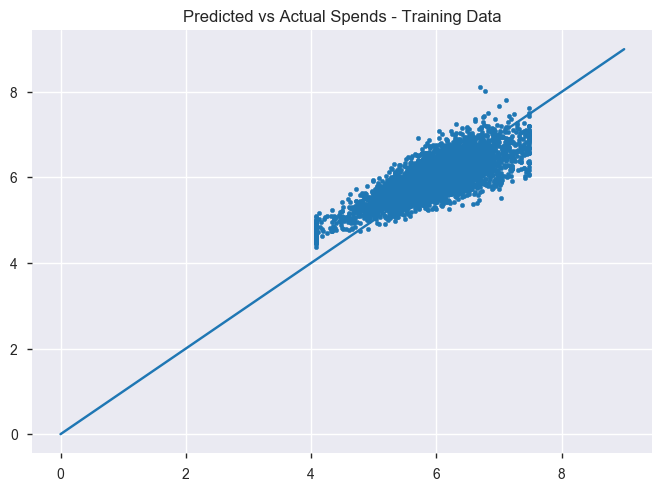

In [83]:
plt.scatter(x= comparison["ln_totalcard_spend"], y= comparison["output_values"], s=10)
plt.plot(range(10),range(10),'-')
plt.title("Predicted vs Actual Spends - Training Data")

In [101]:
from sklearn.linear_model import LinearRegression

In [102]:
print train_X.shape
print train_y.shape
print test_X.shape
print test_y.shape

(4000, 94)
(4000L,)
(1000, 94)
(1000L,)


In [104]:
linreg = LinearRegression()
linreg.fit( train_X, train_y )
#y_pred = linreg.predict( test_y )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [105]:
y_pred = linreg.predict( test_X )

In [106]:
test_pred = pd.DataFrame( { 'actual':  test_y,
                            'predicted': linreg.predict( test_X ) } )

In [96]:
test_pred

,actual,predicted
1501,5.520701,5.362156
2586,5.973759,5.856833
2653,4.791899,4.910876
1055,6.585413,6.502451
705,6.060174,6.054870
106,5.593782,5.706870
589,6.303022,5.729558
2468,5.854843,5.711285
2413,6.440978,6.351385
1600,4.939068,5.308552
